### **About the Project: Medical Cost Prediction Using Linear Regression**

This project focuses on predicting individual medical insurance costs by leveraging demographic, lifestyle, and health-related data. The dataset includes details about beneficiaries, such as their age, gender, body mass index (BMI), smoking habits, and residential regions in the U.S., alongside the corresponding medical expenses billed to their health insurance.

The primary objective is to develop a **linear regression model** that accurately estimates medical charges based on these features. This model will provide valuable insights into the key factors influencing healthcare costs, enabling insurance companies to optimize premium calculations and empowering individuals to make informed lifestyle choices.

---

### **Objectives**
1. Conduct **exploratory data analysis (EDA)** to uncover patterns and relationships between variables.
2. Build and optimize a **linear regression model** to predict the medical charges (`charges`).
3. Assess model performance using metrics such as **R-squared**, **Mean Squared Error (MSE)**, and residual analysis.
4. Analyze the significance of predictors like smoking habits, BMI, and age in determining healthcare costs.

---

### **Expected Outcomes**
- A detailed understanding of how demographic, health, and lifestyle factors drive medical insurance costs.
- A high-performing linear regression model capable of making reliable cost predictions.
- Actionable insights into the most influential predictors, such as smoking and BMI, to guide healthcare policy and individual decision-making.

---

### **Applications**
This project illustrates the practical use of machine learning in healthcare by delivering insights that benefit multiple stakeholders:
- **Insurance Companies**: Refine risk assessment and premium structures.
- **Healthcare Providers**: Recognize cost patterns to enhance resource allocation.
- **Policyholders**: Identify personal factors contributing to insurance expenses.


### **1. Problem Statement**

The increasing cost of healthcare services poses a significant challenge for both insurance providers and policyholders. Identifying the underlying factors influencing these costs—such as age, BMI, and smoking habits—is critical for making fair, data-driven decisions in pricing and healthcare planning. 

This project aims to build a predictive model using linear regression to estimate individual medical charges based on demographic, lifestyle, and health attributes. By uncovering patterns in medical cost distribution, this project seeks to enable proactive risk management and encourage healthier lifestyle choices among beneficiaries.

### **2. Data Collection** 

- Dataset Source- https://www.kaggle.com/datasets/mirichoi0218/insurance/data

- The data consists of 7 column and 1338 rows



## 2.1 Import Data and Required Packages

Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


In [3]:
df = pd.read_csv('data/medical_insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
# Display basic information about the DataFrame
print("Basic Info:")
print(df.info())

Basic Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None


### **2.2 Key Features of the Dataset**

1. **Demographic Variables**:
   - **`age`**: Age of the primary beneficiary.
   - **`sex`**: Gender of the insurance holder (male or female).
   - **`region`**: Residential region in the U.S. (northeast, southeast, southwest, northwest).

2. **Lifestyle and Health Metrics**:
   - **`bmi`**: Body Mass Index, a standard measure of body weight relative to height.
   - **`smoker`**: Smoking status of the beneficiary (yes or no).

3. **Family Characteristics**:
   - **`children`**: Number of dependents covered under the insurance.

4. **Target Variable**:
   - **`charges`**: Total medical costs billed to the individual by their insurance provider.

In [5]:

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())




Missing Values:
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


In [6]:
# Check for duplicates
print("\nDuplicates:")
print(f"Number of duplicate rows: {df.duplicated().sum()}")


Duplicates:
Number of duplicate rows: 1


In [7]:
duplicate_rows = df[df.duplicated()]
print("Duplicate Rows:")
print(duplicate_rows)

df = df.drop_duplicates()
print(f"Number of rows after removing duplicates: {len(df)}")



Duplicate Rows:
     age   sex    bmi  children smoker     region    charges
581   19  male  30.59         0     no  northwest  1639.5631
Number of rows after removing duplicates: 1337


In [8]:
# Check data types
print("\nData Types:")
print(df.dtypes)


Data Types:
age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object


In [9]:
# Check the number of unique values in each column
print("\nNumber of Unique Values:")
print(df.nunique())



Number of Unique Values:
age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64


In [10]:
# Check statistics of the dataset
print("\nDescriptive Statistics (Numerical Columns):")
print(df.describe())



Descriptive Statistics (Numerical Columns):
               age          bmi     children       charges
count  1337.000000  1337.000000  1337.000000   1337.000000
mean     39.222139    30.663452     1.095737  13279.121487
std      14.044333     6.100468     1.205571  12110.359656
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.290000     0.000000   4746.344000
50%      39.000000    30.400000     1.000000   9386.161300
75%      51.000000    34.700000     2.000000  16657.717450
max      64.000000    53.130000     5.000000  63770.428010


### Insights from Descriptive Statistics:

#### 1. **Age**:
   - **Mean**: 39.22 years – The average age is roughly 39 years.

   - **Min/Max**: Ages range from 18 to 64, covering adults up to retirement age.

   - **Spread**: The **standard deviation (14.04)** shows a moderate spread, indicating a good range of ages.

#### 2. **BMI (Body Mass Index)**:
   - **Mean**: 30.66 – This is slightly above the threshold for overweight (BMI > 25).

   - **Min/Max**: BMI ranges from 15.96 (underweight) to 53.13 (morbidly obese).

   - **Spread**: The **standard deviation (6.1)** indicates some variation, possibly skewed toward higher BMI values.
   - A closer look at BMI distribution might help identify outliers or anomalies.

#### 3. **Children**:
   - **Mean**: 1.1 – On average, individuals have approximately 1 child.

   - **Min/Max**: No children to a maximum of 5.

   - **Spread**: The **standard deviation (1.2)** indicates most people have between 0 and 2 children.

#### 4. **Charges** (Insurance Cost):
   - **Mean**: $13,279 – This is the average insurance charge.

   - **Min/Max**: Charges range from $1,121 to $63,770, showing a wide disparity.

   - **Spread**: The **standard deviation ($12,110)** reflects significant variability, likely driven by factors such as smoking status, BMI, and age.
   
   - **Skewness**: The max charge ($63,770) is significantly higher than the 75th percentile ($16,657), suggesting a right-skewed distribution. Visualization like a histogram could help confirm this.


# Visualizations:

### 1. **Distribution of Charges**

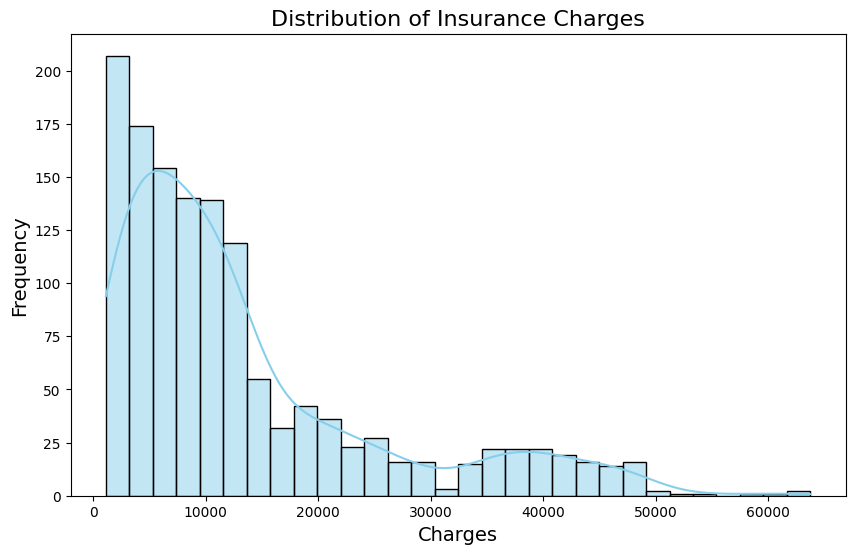

In [11]:

plt.figure(figsize=(10, 6))
sns.histplot(df['charges'], kde=True, bins=30, color='skyblue')
plt.title('Distribution of Insurance Charges', fontsize=16)
plt.xlabel('Charges', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.show()



Distribution of Charges (Histogram):

- Shows a heavily right-skewed distribution

- Large concentration of charges below $20,000

- Long tail extending to around $63,770

- Clear indication of non-normal distribution

- Suggests need for log transformation in modeling

### 2. **Scatter Plot: Charges vs BMI**

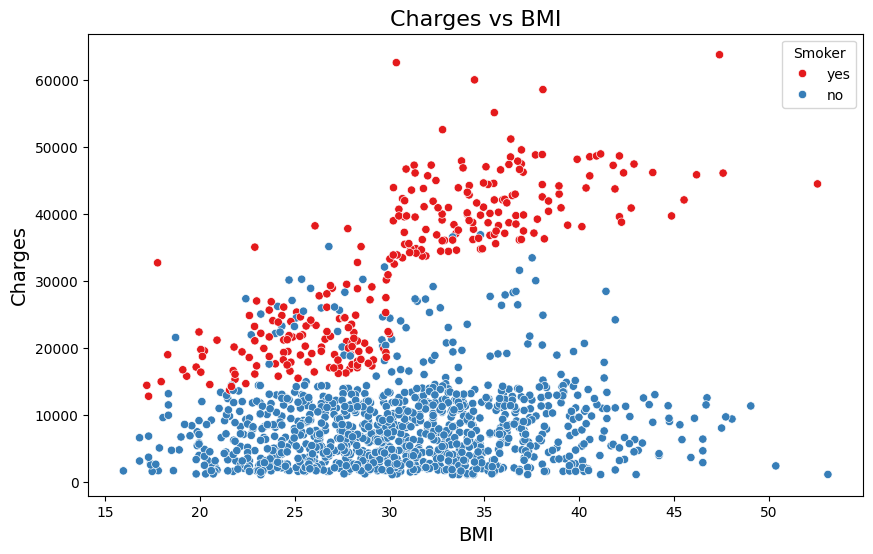

In [12]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='bmi', y='charges', hue='smoker', data=df, palette='Set1')
plt.title('Charges vs BMI', fontsize=16)
plt.xlabel('BMI', fontsize=14)
plt.ylabel('Charges', fontsize=14)
plt.legend(title='Smoker')
plt.show()

Charges vs BMI (Scatter Plot):

- Two distinct clusters based on smoking status

- Non-smokers: Linear trend with moderate slope

- Smokers: Higher baseline with steeper slope

- Clear separation between smoker/non-smoker charges

- More variance in charges at higher BMI levels

### 3. **Scatter Plot: Charges vs Age**

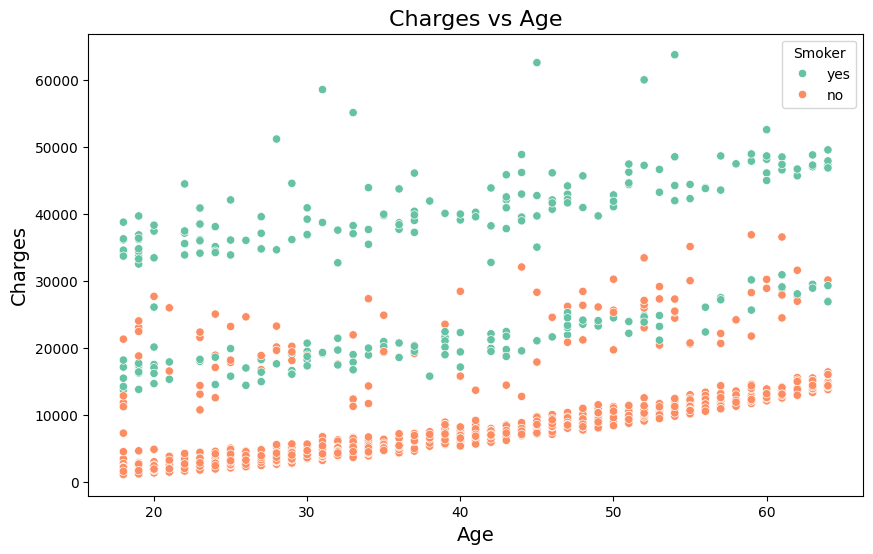

In [13]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='charges', hue='smoker', data=df, palette='Set2')
plt.title('Charges vs Age', fontsize=16)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Charges', fontsize=14)
plt.legend(title='Smoker')
plt.show()

Charges vs Age (Scatter Plot):

- Strong positive correlation with age

- Two distinct trend lines (smokers/non-smokers)

- Smokers show steeper increase with age

- More variance in older age groups

- Non-smokers maintain relatively flat trend

### 4. **Boxplot: Charges by Region**

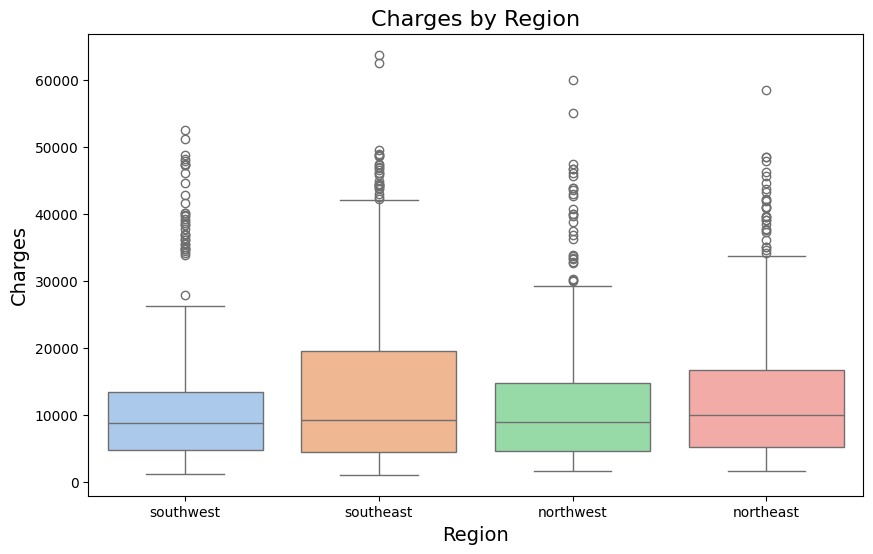

In [14]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='region', y='charges', data=df, palette='pastel')
plt.title('Charges by Region', fontsize=16)
plt.xlabel('Region', fontsize=14)
plt.ylabel('Charges', fontsize=14)
plt.show()

Charges by Region (Box Plot):

- Similar median charges across regions

- Consistent outlier patterns in all regions

- Southwest shows slightly higher median

- Northeast shows slightly more compact distribution

- All regions show significant outliers above

### Summary insights:

1. **Distribution of Charges**:
   - The distribution of charges is right-skewed, with most charges concentrated at the lower end.

   - A few individuals incur significantly higher charges, likely influenced by smoking status, high BMI, or age.

2. **Charges vs. BMI**:
   - Higher BMI often corresponds to higher charges, especially for smokers.

   - Smokers (red points) generally have much higher charges compared to non-smokers (blue points) at similar BMI levels.

3. **Charges vs. Age**:
   - Insurance charges tend to increase with age, likely due to increased health risks.

   - Smokers again show significantly higher charges compared to non-smokers in the same age group.

4. **Charges by Region**:
   - The distribution of charges across regions shows some variation, but the median charges appear similar.
   
   - Outliers exist in all regions, with the highest charges occurring in certain cases.


### **Identify Outliers**
using statistical methods like the **Interquartile Range (IQR)** or the **Z-Score** to detect outliers.

#### Using IQR:
Outliers are defined as values beyond **1.5 times the IQR**.


In [22]:
Q1 = df['charges'].quantile(0.25)
Q3 = df['charges'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df['charges'] < lower_bound) | (df['charges'] > upper_bound)]
print(f"Number of outliers: {len(outliers)}")

Number of outliers: 139


#### Using Z-Score:
Z-Score measures how many standard deviations a data point is from the mean. Commonly, a Z-Score threshold of ±3 is used.


In [23]:

from scipy.stats import zscore

df['zscore_charges'] = zscore(df['charges'])
outliers = df[(df['zscore_charges'] < -3) | (df['zscore_charges'] > 3)]
print(f"Number of outliers: {len(outliers)}")


Number of outliers: 7



### **Treating the Outliers**

#### **Log Transformation**
Since the data has a skewed distribution, applying logarithmic transformation.



In [24]:

df['charges_log'] = np.log(df['charges'] + 1)  # Adding 1 to avoid log(0)


### **Recheck the Data**
After treating outliers, visualizing the data again to ensure the treatment was effective.

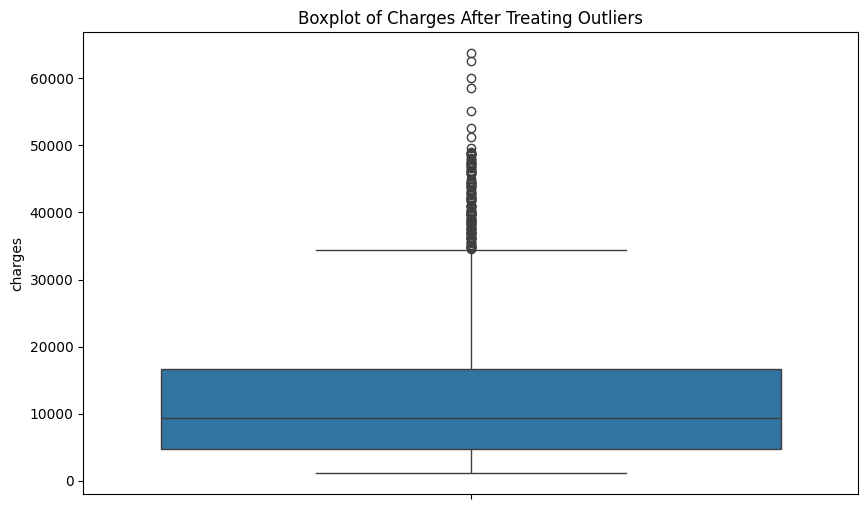

In [25]:
plt.figure(figsize=(10, 6))
sns.boxplot(y='charges', data=df)
plt.title('Boxplot of Charges After Treating Outliers')
plt.show()

## Let’s explore additional relationships to gain more insights into the dataset. Here are a few potential relationships to visualize:


### 1. **Charges vs. Number of Children**
This helps us understand if the number of children affects insurance charges.


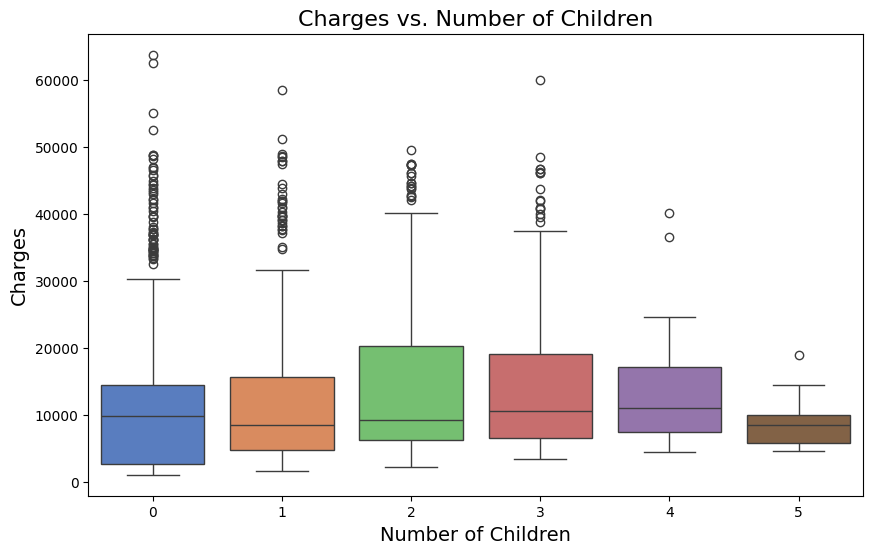

In [26]:

plt.figure(figsize=(10, 6))
sns.boxplot(x='children', y='charges', data=df, palette='muted')
plt.title('Charges vs. Number of Children', fontsize=16)
plt.xlabel('Number of Children', fontsize=14)
plt.ylabel('Charges', fontsize=14)
plt.show()



Charges vs Number of Children (Box Plot):

- Slight increase in median charges with more children

- Largest variance for 2-3 children

- More outliers in families with 1-3 children

- Relatively stable median up to 2 children

- Slight decrease for 4-5 children

### 2. **BMI Distribution by Smoker Status**
To check how BMI varies between smokers and non-smokers.

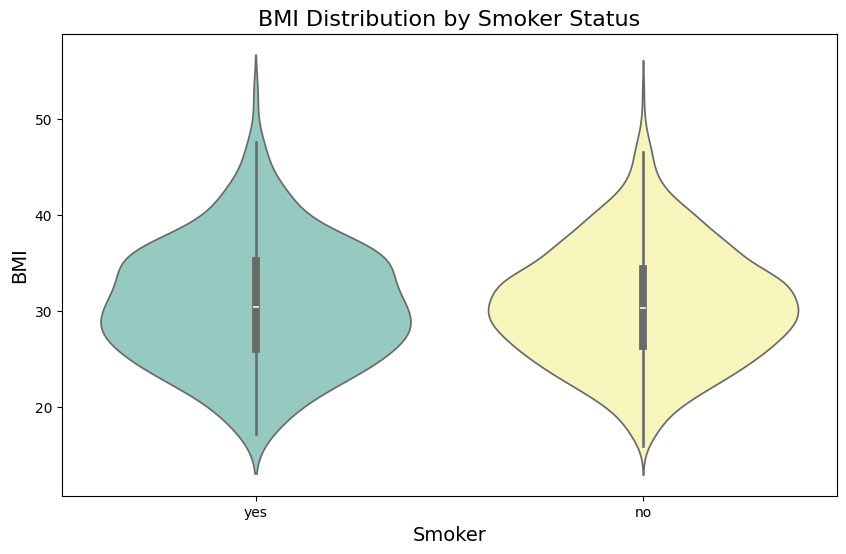

In [16]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='smoker', y='bmi', data=df, palette='Set3')
plt.title('BMI Distribution by Smoker Status', fontsize=16)
plt.xlabel('Smoker', fontsize=14)
plt.ylabel('BMI', fontsize=14)
plt.show()

BMI Distribution by Smoker Status (Violin Plot):

- Similar BMI distributions for smokers and non-smokers

- Slightly higher median BMI in smokers

- Both groups show normal-like distribution

- Similar variance in both groups

- Few outliers in very high BMI ranges

### 3. **Charges vs. Age by Region**
To see how charges vary with age across different regions.

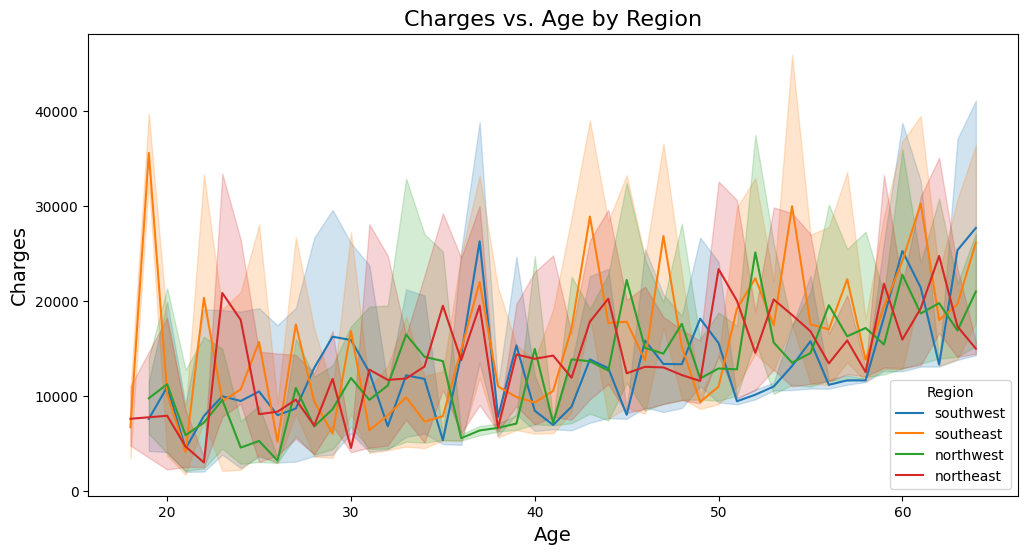

In [17]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='age', y='charges', hue='region', data=df, palette='tab10')
plt.title('Charges vs. Age by Region', fontsize=16)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Charges', fontsize=14)
plt.legend(title='Region')
plt.show()

Charges vs Age by Region (Line Plot):

- Parallel trends across regions

- Age-related increase consistent across regions

- Some regional variation in slope

- Higher variance in older age groups

- Intersecting lines suggesting interaction effects




### 4. **Correlation Heatmap**
To explore correlations between numerical variables.

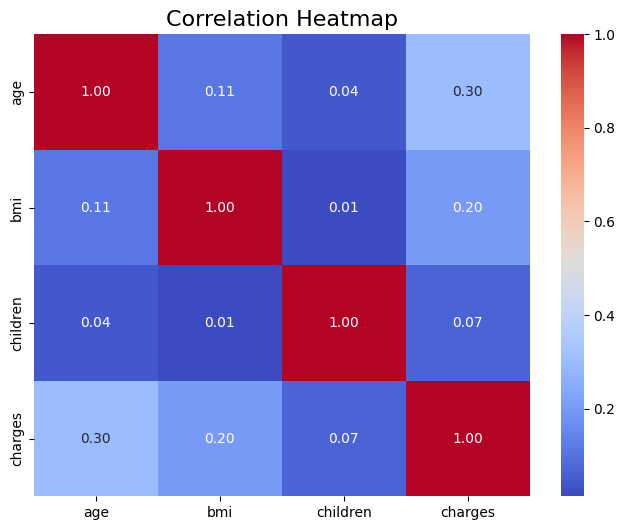

In [19]:
# Select only numeric columns
numerical_columns = df.select_dtypes(include=['int64', 'float64'])

# Compute correlation matrix
corr = numerical_columns.corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap', fontsize=16)
plt.show()


Correlation Heatmap:

- Strong positive correlation between age and charges

- Moderate positive correlation between BMI and charges

- Weak positive correlation between children and charges

- No strong correlations between predictors

- Suggests limited multicollinearity issues




### 5. **Pairplot for Numerical and Categorical Interactions**
This visualizes relationships across all numerical features, separated by categorical variables (e.g., smoker).

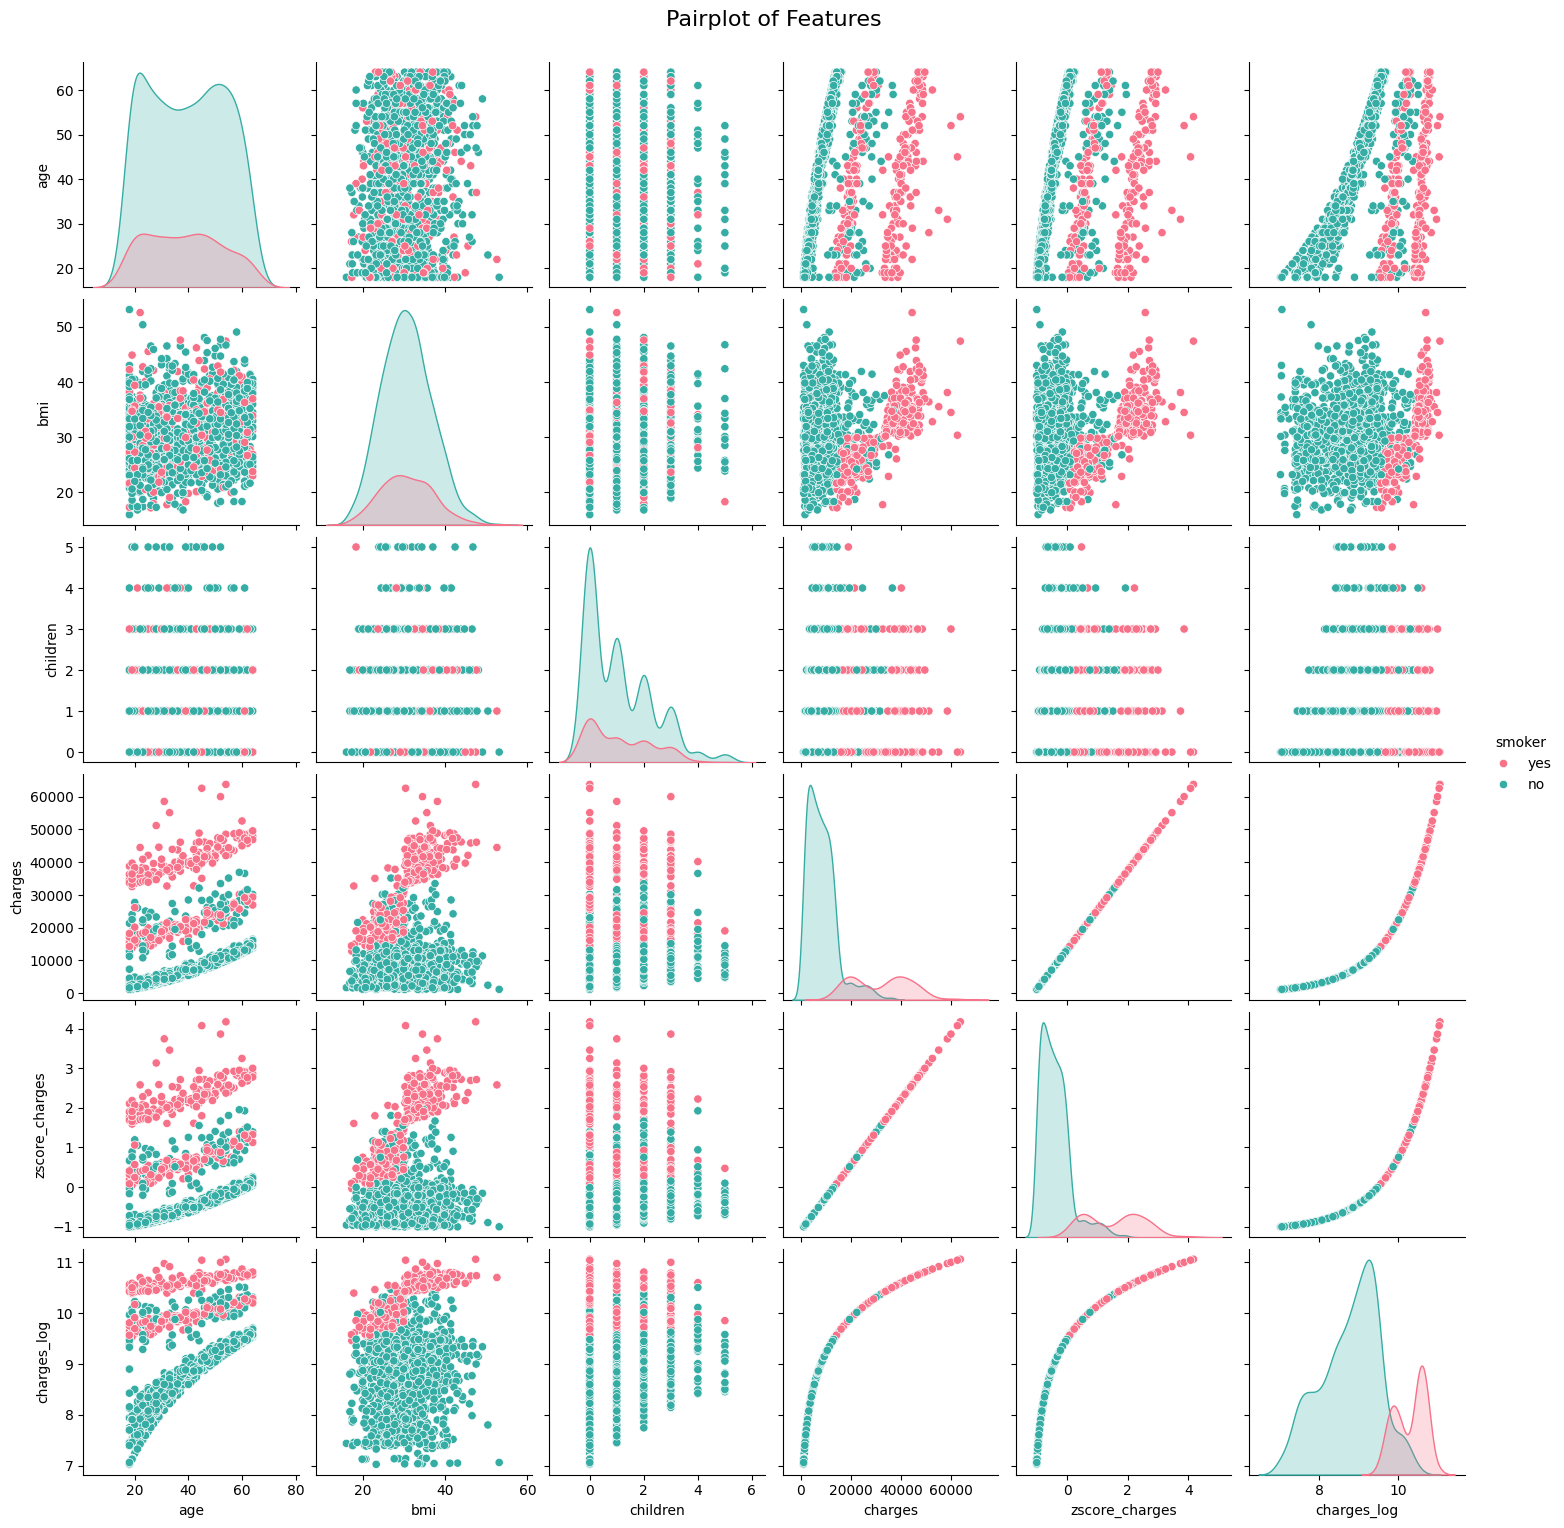

In [27]:
sns.pairplot(df, hue='smoker', diag_kind='kde', palette='husl')
plt.suptitle('Pairplot of Features', y=1.02, fontsize=16)
plt.show()

Pairplot:

- Confirms bimodal distribution based on smoking

- Shows clear separation in charge patterns

- Reveals non-linear relationships

- Demonstrates interaction effects

- Supports need for feature transformation

## CONCLUSION

Key Visual Insights:

- Smoking status is the strongest differentiator

- Age and BMI show consistent positive correlations

- Regional differences are minimal

- Data contains significant outliers

- Relationships are often non-linear

- Evidence of interaction effects

- Need for data transformation evident